# Dataset

In [1]:
# Dataset: banknotes.csv 

# Import all libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#### Read the data

In [4]:
df= pd.read_csv('banknotes.csv')

In [5]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
#### Seperate the varaiable

In [75]:
x = df [['Variance','Skewness', 'Curtosis' , 'Entropy']]
y = df ['Class']
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


([<matplotlib.patches.Wedge at 0x232c555af20>,
 [Text(-0.19046171571266454, 1.0833855891822581, '0'),
  Text(0.19046171571266443, -1.0833855891822581, '1')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

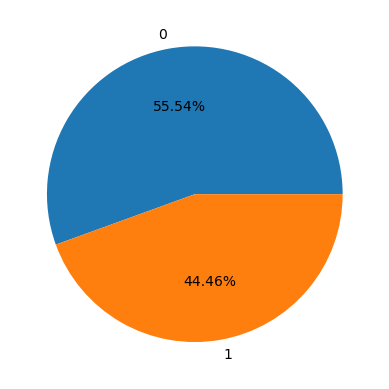

In [76]:
y = df['Class']
plt.pie(y.value_counts(), autopct='%2.2f%%',labels=[0,1])

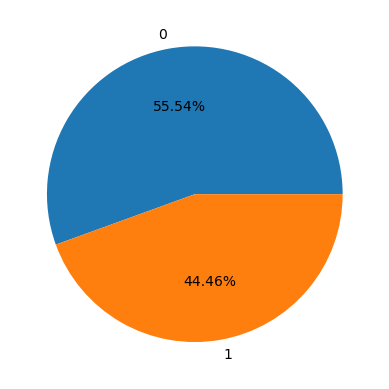

In [77]:
plt.pie(y.value_counts(), autopct='%2.2f%%', labels=[0,1]);

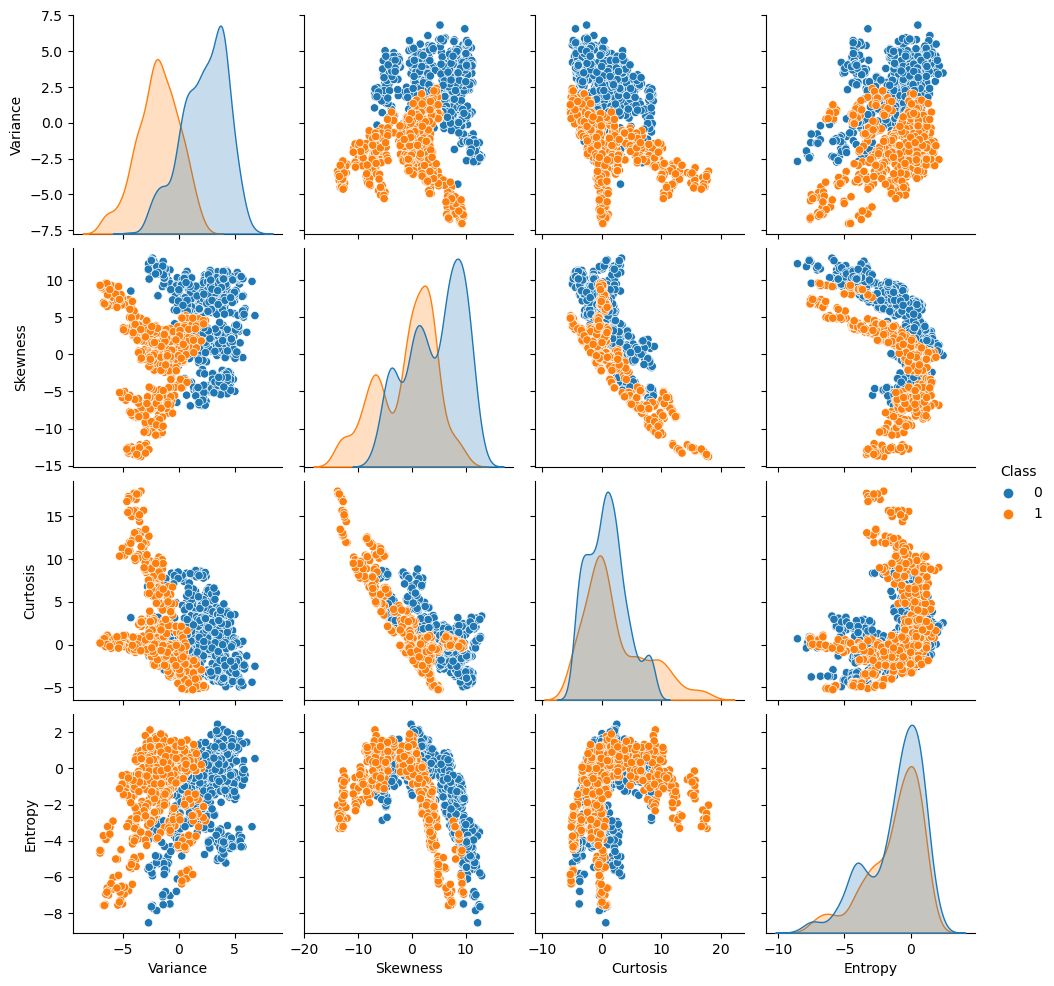

In [78]:
sns.pairplot(df,hue='Class')

# Cross Validation

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [80]:
x_train.shape

(1029, 4)

In [81]:
x_test.shape

(343, 4)

# Decision Tree Classifier Name

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

# Plot the Tree

In [84]:
from sklearn.tree import plot_tree

[Text(0.4991319444444444, 0.9444444444444444, 'x[0] <= 0.274\ngini = 0.495\nsamples = 1029\nvalue = [567, 462]'),
 Text(0.3298611111111111, 0.8333333333333334, 'x[1] <= 7.565\ngini = 0.298\nsamples = 495\nvalue = [90, 405]'),
 Text(0.22916666666666666, 0.7222222222222222, 'x[0] <= -0.471\ngini = 0.129\nsamples = 417\nvalue = [29, 388]'),
 Text(0.1111111111111111, 0.6111111111111112, 'x[2] <= 6.746\ngini = 0.061\nsamples = 349\nvalue = [11, 338]'),
 Text(0.05555555555555555, 0.5, 'x[1] <= 7.293\ngini = 0.008\nsamples = 249\nvalue = [1, 248]'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 245\nvalue = [0, 245]'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[3] <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05555555555555555, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1111111111111111, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -4.8\ngini = 0.18\nsampl

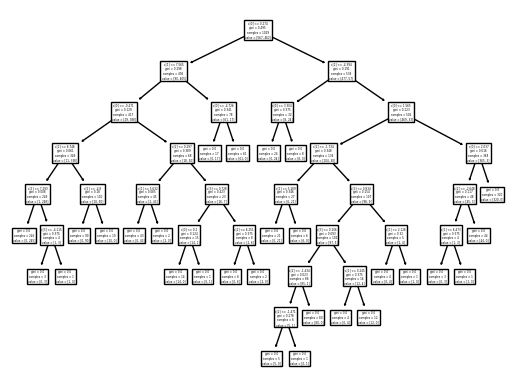

In [85]:
plot_tree(classifier)

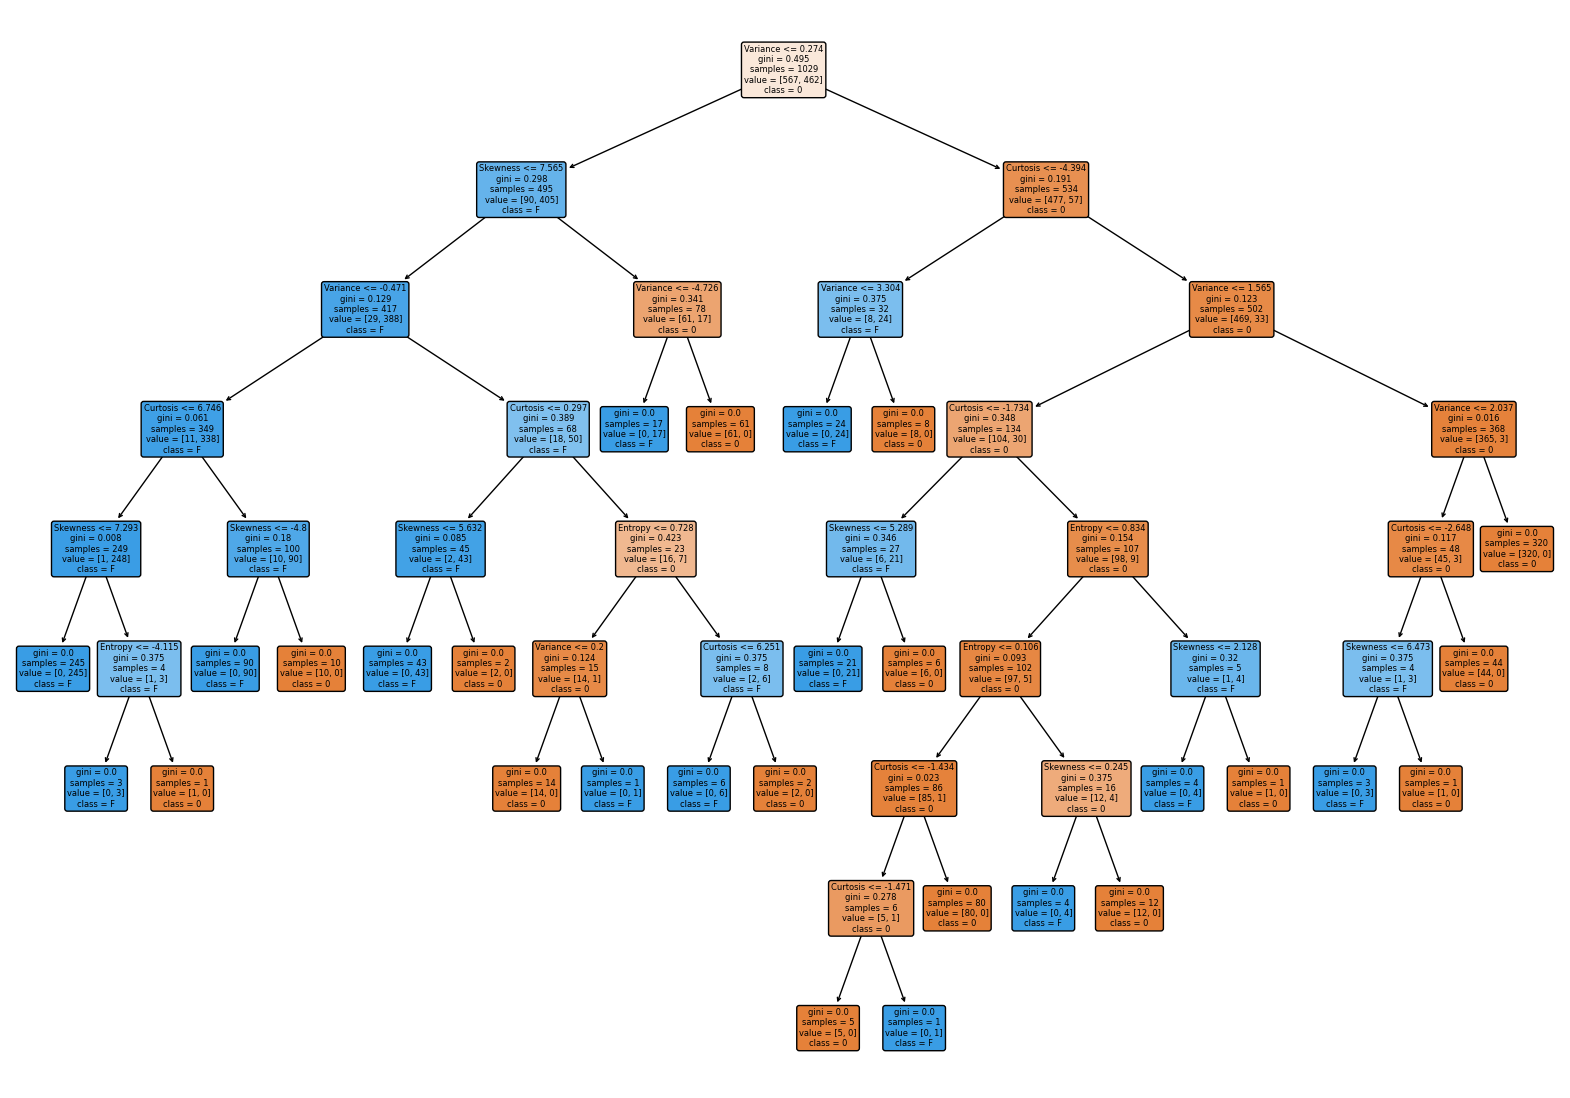

In [86]:
plt.figure(figsize= (20,14))
plot_tree(classifier, fontsize=6, filled=True, feature_names=x.columns, 
          class_names=['0','F'], rounded=True);
plt.savefig('mytree.png')

# Performance Evalation

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

In [88]:
y_pred = classifier.predict(x_test)

In [89]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

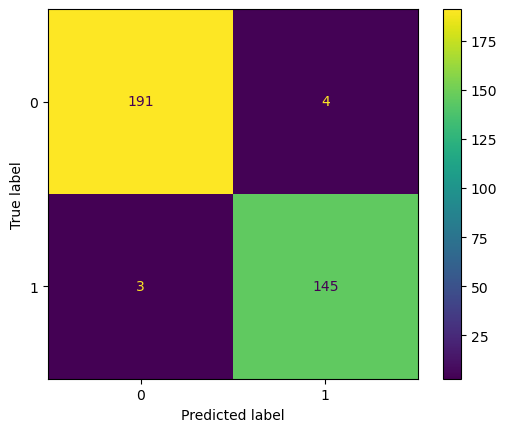

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [91]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [92]:
new = pd.DataFrame({
    'Variance': [3.86600, 0.32924, -3.56370],
    'Skewness':[-2.63830, -4.45520, -8.38270],
    'Curtosis':[1.9242, 4.5718, 12.3930],
    'Entropy':[0.10645, -0.98880, -1.28230]
})

In [93]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.86600,-2.6383,1.9242,0.10645
1,0.32924,-4.4552,4.5718,-0.98880
2,-3.56370,-8.3827,12.3930,-1.28230


In [95]:
classifier.predict(new)

array([0, 0, 1], dtype=int64)